# Demand Simulation

This notebook demonstrates how to simulate stochastic demand processes using a Geometric Brownian Motion (GBM) model with decay.

## Model Details
The GBM with decay is given by:
$$dS(t) = (μ - η)S(t)dt + σS(t)dW(t)$$

where:
- $S(t)$ is demand at time $t$
- $μ$ is drift rate
- $η$ is decay rate
- $σ$ is volatility 
- $W(t)$ is a Wiener process

## Key Features
- Natural market decay/obsolescence
- Market volatility 
- Trend/drift components
- Multiple simulation paths

## Outputs
- Individual simulation paths
- Mean demand trajectory
- Final demand distribution
- Quantile paths
- Probability of demand thresholds

Let's explore the simulation step-by-step using the `StochasticDemandProcess` class.

## 1. Setup
First import required packages and the StochasticDemandProcess class.

In [1]:
from supplyseer.models.statistical.stochasticprocess import StochasticDemandProcess, DemandSimConfig

## 2. Configure Simulation Parameters 
Create a DemandSimConfig with:
- Initial demand
- Drift rate
- Volatility
- Decay rate
- Time horizon
- Number of paths 
- Time steps

In [2]:
config = DemandSimConfig(
    initial_demand=600000, # This represents your baseline demand before any stochastic change
    drift=0.05,         # drift parameter mu represents the trend component (0.05 = 5% expected trend rate and you can set it to negative)
    volatility=0.1,     # volatility parameter sigma represents the standard deviation (0.1 = 10% volatility in demand changes and cannot be negative)
    decay_rate=0.05,    # natural decay rate of demand over time (0.05 = 5% decay rate, e.g for seasonal or declining products)
    time_horizon=1.0,   # time horizon for simulation in years
    n_paths=1000,       # number of monte carlo simulations to generate
    n_steps=365 - 1,         # number of time steps to divide the simulation into, 364 steps over 1 year
    random_seed=42      # reproducibility state
)

## 3. Run Base Simulation
Instantiate process and run basic simulation showing:
- Multiple paths
- Mean trajectory
- Final distribution

In [3]:
sim = StochasticDemandProcess(config)
results = sim.simulate()

In [4]:
results.final_distribution

{'mean': 542658.8526823464,
 'std': 54274.8643684995,
 'median': 540048.602478638,
 'q25': 504121.5572584848,
 'q75': 578510.58697989}

In [5]:
# All paths are listed here
# 1000 Monte Carlo simulations for 364 days
# You can do your own analysis or modeling with feature engineering or new simulations with interventions
results.paths.shape

(1000, 364)

c:\Users\jako\anaconda3\envs\geminicomp\Lib\site-packages\supplyseer\models\statistical\stochasticprocess.py:255: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(<Figure size 1800x800 with 2 Axes>,
 (<Axes: title={'center': 'Demand Evolution Simulation\nInitial demand: 600,000'}, xlabel='Time', ylabel='Demand Level'>,
  <Axes: title={'center': 'Final Distribution'}>))

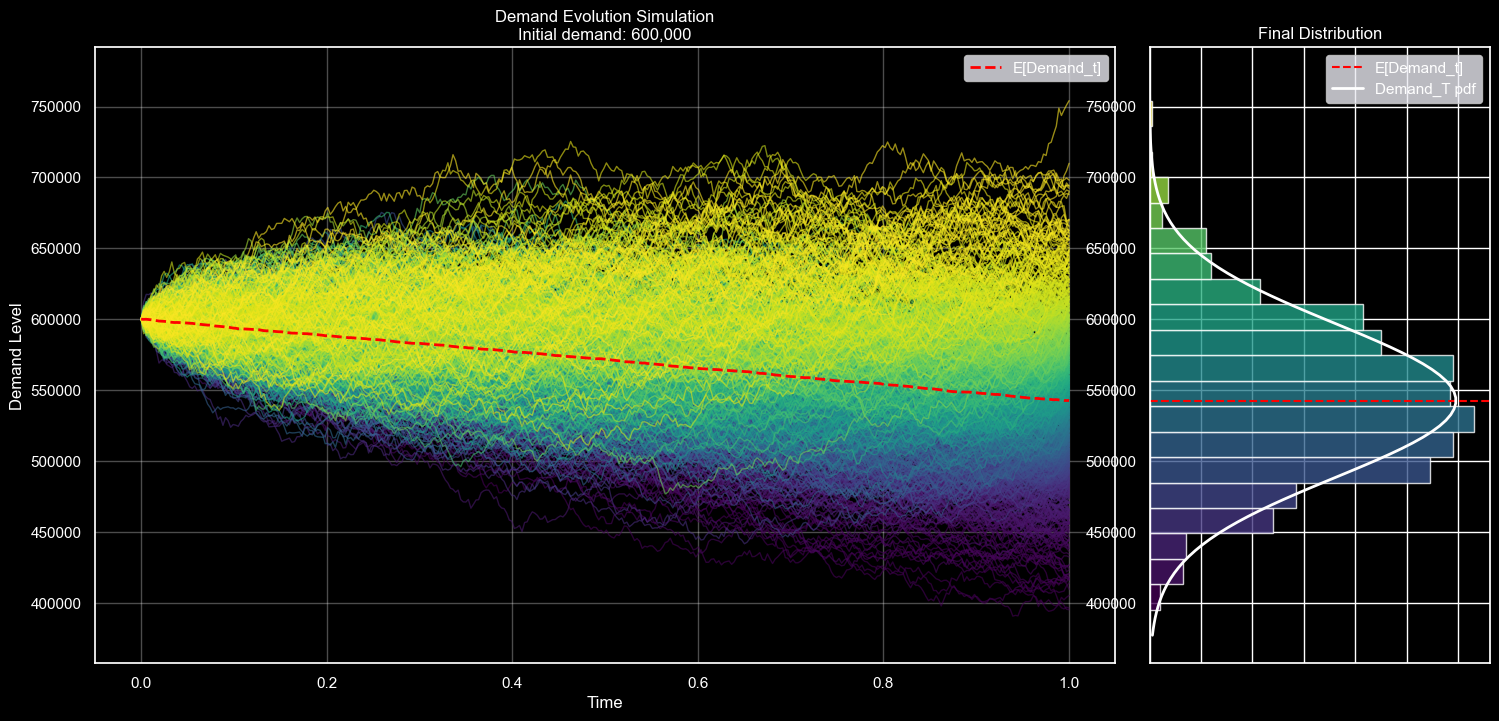

In [6]:
sim.plot_results()

In [17]:
import matplotlib.pyplot as plt
import numpy as np
    

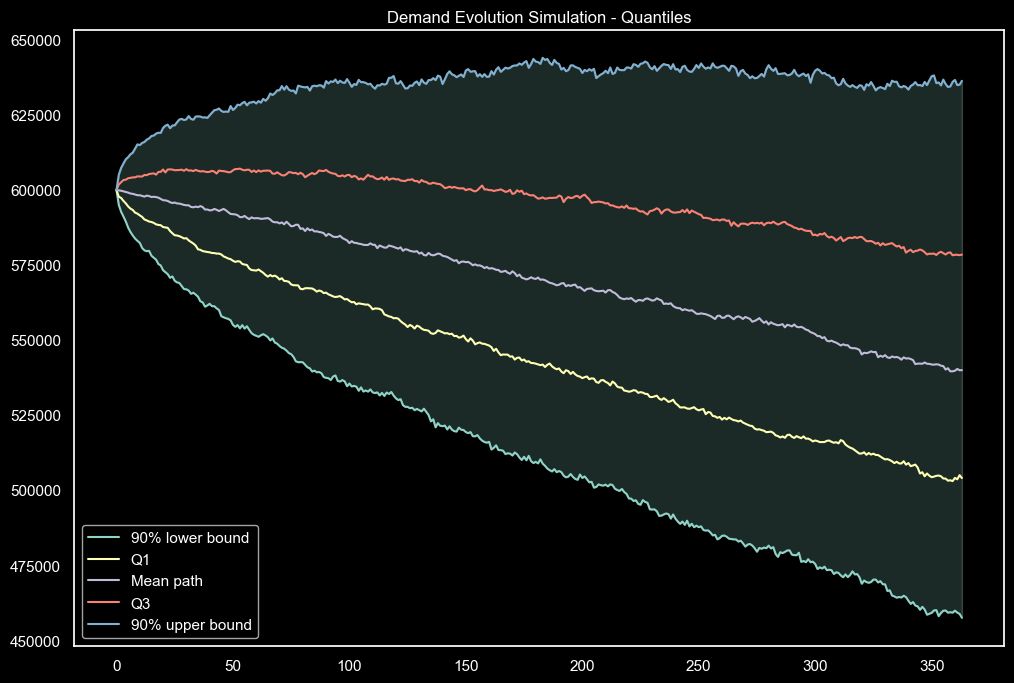

In [80]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 8))

plt.plot(sim.get_quantile_paths()[0.05], label="90% lower bound")
plt.plot(sim.get_quantile_paths()[0.25], label="Q1")
plt.plot(sim.get_quantile_paths()[0.5], label="Mean path")
plt.plot(sim.get_quantile_paths()[0.75], label="Q3")
plt.plot(sim.get_quantile_paths()[0.95], label="90% upper bound")

plt.fill_between(range(364), sim.get_quantile_paths()[0.05], sim.get_quantile_paths()[0.95], facecolor="C0", alpha=.2)
# plt.fill_between(range(364), sim.get_quantile_paths()[0.25], sim.get_quantile_paths()[0.75], facecolor="C1", alpha=.2)


plt.title("Demand Evolution Simulation - Quantiles")

plt.legend()
plt.grid(False)


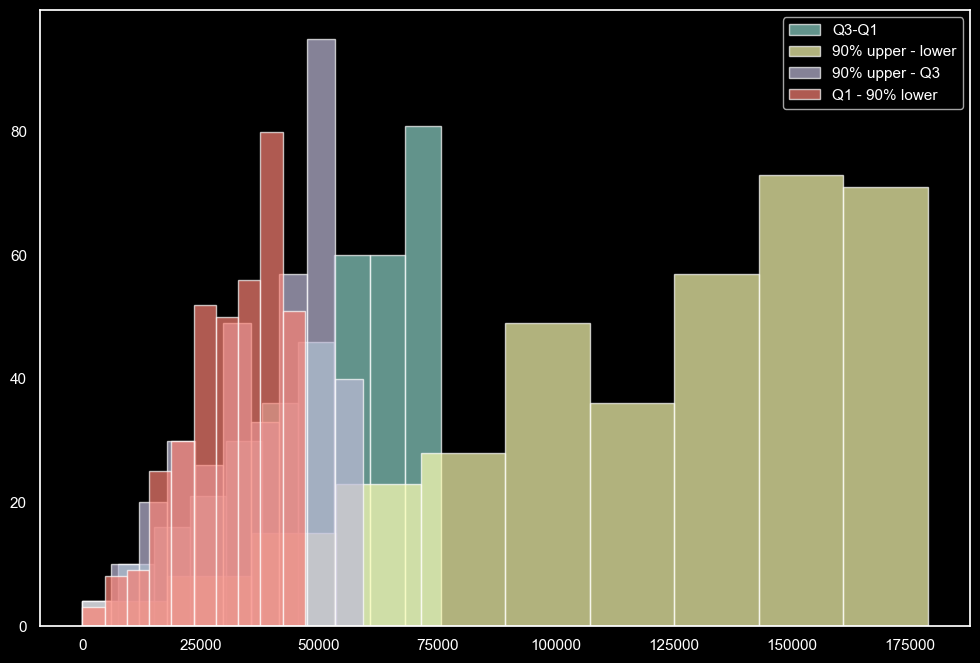

In [66]:
quantile_interval_q1q3 = sim.get_quantile_paths()[0.75] - sim.get_quantile_paths()[0.25]
quantile_interval_lower_upper = sim.get_quantile_paths()[0.95] - sim.get_quantile_paths()[0.05]
quantile_interval_q3_upper = sim.get_quantile_paths()[0.95] - sim.get_quantile_paths()[0.75]
quantile_interval_q1_lower = sim.get_quantile_paths()[0.25] - sim.get_quantile_paths()[0.05]


plt.figure(figsize=(12 ,8))

plt.hist(quantile_interval_q1q3, alpha=.7, label="Q3-Q1")
plt.hist(quantile_interval_lower_upper, alpha=.7, label="90% upper - lower")
plt.hist(quantile_interval_q3_upper, alpha=.7, label="90% upper - Q3")
plt.hist(quantile_interval_q1_lower, alpha=.7, label="Q1 - 90% lower")

plt.legend()
plt.grid(False)

### Descriptive statistics

If we never plot the distribution of the 90% interval we might not know the shape of it. <br>
But we can compute its moments (mean, standard deviation, kurtosis, and skewness) to get another picture.   <br>
<br>

A negative skew and negative kurtosis confirms the plot above for the 90% upper and lower interval. <br>
It is skewed to the right (negative skew) and doesn't have a sharp peak around its mean (negative kurtosis).


In [ ]:
from scipy.stats import kurtosis, skew


sd_full_interval = np.std(quantile_interval_lower_upper)
mu_full_interval = np.mean(quantile_interval_lower_upper)
kurt_full_interval = kurtosis(quantile_interval_lower_upper)
skew_full_interval = skew(quantile_interval_lower_upper)


print(f"The standard deviation of the 90% interval is: {sd_full_interval} and the mean of the interval is {mu_full_interval}")
print(f"The 3rd and 4th moments of the 90% interval is for kurtosis: {kurt_full_interval} and for skewness: {skew_full_interval}")

The standard deviation of the 90% interval is: 40882.19363027618 and the mean of the interval is 122492.46086606977
The 3rd and 4th moments of the 90% interval is for kurtosis: -0.3513859651305 and for skewness: -0.7119303572109356


### Smaller interval
Doing the same statistics for the smaller interval 75% to 25% quantiles shows another story

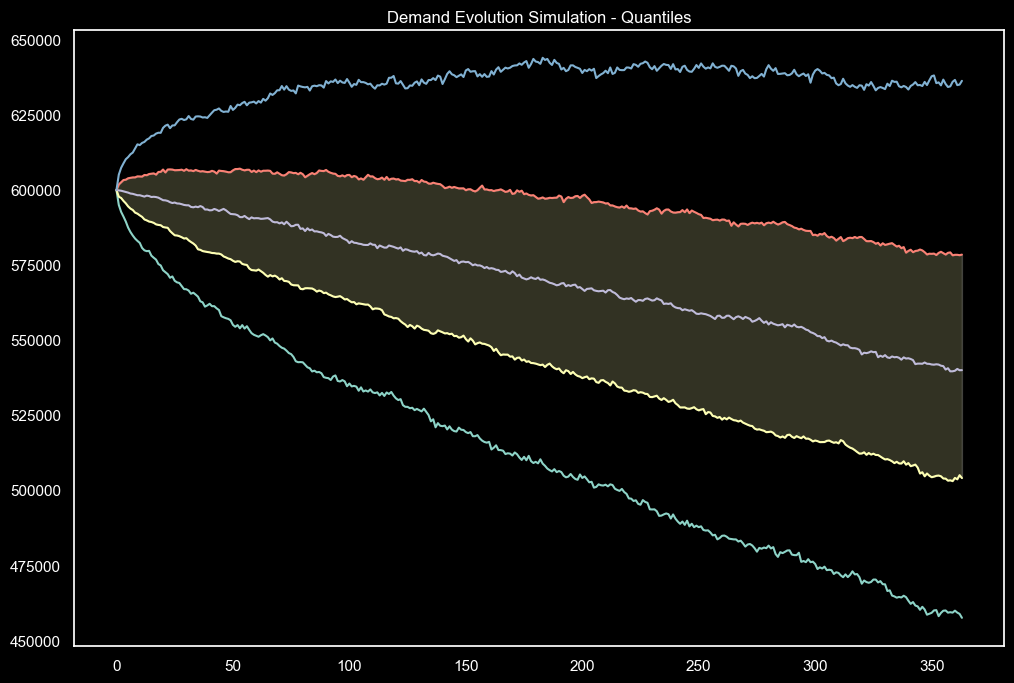

In [78]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 8))

plt.plot(sim.get_quantile_paths()[0.05])
plt.plot(sim.get_quantile_paths()[0.25])
plt.plot(sim.get_quantile_paths()[0.5])
plt.plot(sim.get_quantile_paths()[0.75])
plt.plot(sim.get_quantile_paths()[0.95])

# plt.fill_between(range(364), sim.get_quantile_paths()[0.05], sim.get_quantile_paths()[0.95], facecolor="C8", alpha=.2)
plt.fill_between(range(364), sim.get_quantile_paths()[0.25], sim.get_quantile_paths()[0.75], facecolor="C1", alpha=.2)


plt.title("Demand Evolution Simulation - Quantiles")

plt.grid(False)


In [82]:
sd_full_interval = np.std(quantile_interval_q1q3)
mu_full_interval = np.mean(quantile_interval_q1q3)
kurt_full_interval = kurtosis(quantile_interval_q1q3)
skew_full_interval = skew(quantile_interval_q1q3)


print(f"The standard deviation of the Q3-Q1 interval is: {sd_full_interval} and the mean of the interval is {mu_full_interval}")
print(f"The 3rd and 4th moments of the Q3-Q1 interval is for kurtosis: {kurt_full_interval} and for skewness: {skew_full_interval}")

The standard deviation of the Q3-Q1 interval is: 17640.950629286337 and the mean of the interval is 51937.95583895929
The 3rd and 4th moments of the Q3-Q1 interval is for kurtosis: -0.35711876465892 and for skewness: -0.7293785130218152
